In [7]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

random.seed(42) 
data = pd.read_csv('sample_data/iris.csv', header=(0))
# armazena as classes no vetor classes: setosa, virginica e versicolor
classes = pd.unique(data[data.columns[-1]])
classes = np.array(classes, dtype=str) 
 
print(classes)
data.head()

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


$$
p(x_j|C_i) = \frac{1}{\sqrt{2\pi\sigma_{C_i}}}\exp \left[ -\frac{1}{2}\left( \frac{x_j-\mu_{C_i}}{\sigma_{C_i}}\right)^2 \right], \quad i=1,2,\ldots, k.
$$

In [8]:
# converte para matrizes do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
# Seleciona o conjunto de teste e treinamento 70%
p = 0.7 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)

# funcao para calcular a verossimilhanca
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    prob = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        prob = prob*gaussian(y[j], m, s)
    return prob

# matriz que armazena o produto da verossimilhanca pela priori
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z) #verossimilhanca
        pc = len(elements)/X_train.shape[0] # priori
        P[classes[i]][j] = pj*pc

P.head()

,setosa,versicolor,virginica
0,1.199159e-04,6.279480e-26,5.390328e-31
1,9.866856e-101,1.768759e-03,1.295369e-06
2,1.554848e-04,4.300014e-20,3.876197e-26
3,4.872271e-43,6.641343e-06,1.131403e-12
4,3.135998e-187,2.440917e-06,6.375437e-03


In [9]:
# realiza a classificao seguindo a regra de Bayes
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia na classificacao
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9555555555555556



**Região de decisão**
Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/
Pode ser usado: conda install -c conda-forge mlxtend

Para o classificador Naive Bayes:

In [5]:

from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

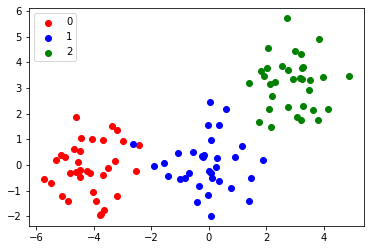

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


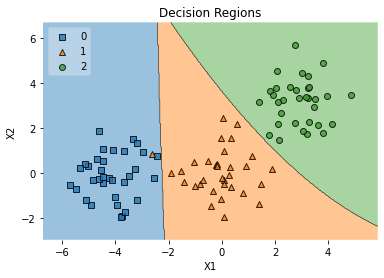

In [6]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()